# Implementation of a Simple Moving Average Crossover Strategy

Author: Matthew Carter

### Introduction

Many indicators and strategies are used to analyse and trade stock prices. In this project I will look at one of the most common, the simple moving average (SMA) crossover strategy. It will be applied to the stock price of one of the world's most valuable public companies, Amazon. Using historical price data the simple strategy will be backtested to see how successful the trades based on it would have been.

### Importing and initial exploration of the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The dataset being analysed contains the last 10 years of daily common stock prices for Amazon and has been downloaded from the Nasdaq website: https://www.nasdaq.com/symbol/amzn/historical.

In [2]:
# Columns to use.
use_cols = ['date', 'close', 'open', 'high', 'low']
# Import dataset.
stock_df = pd.read_csv('AMZN_stock_prices.csv', index_col=0, usecols=use_cols, parse_dates=['date'])

In [3]:
# Display a summary of the DataFrame. 
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2018-11-29 to 2008-12-01
Data columns (total 4 columns):
close    2518 non-null float64
open     2518 non-null float64
high     2518 non-null float64
low      2518 non-null float64
dtypes: float64(4)
memory usage: 98.4 KB


This shows that there are no missing data entries to worry about in this DataFrame.

In [4]:
# Display first few rows of the DataFrame.
stock_df.head()

,close,open,high,low
date,,,,
2018-11-29,1673.57,1674.99,1689.99,1652.331
2018-11-28,1677.75,1613.92,1681.45,1601.215
2018-11-27,1581.42,1575.99,1597.65,1558.010
2018-11-26,1581.33,1539.00,1584.81,1524.220
2018-11-23,1502.06,1517.00,1536.20,1501.810


Currently the row indexes are in descending date order, but this needs reversing.

In [5]:
# Sort the index so it is in ascending date order from oldest to most recent.
stock_df = stock_df.sort_index()

It is common to have daily price percentage changes available because they show how the stock has performed relative to the previous close price. The formula is:

% Change = (Today's Close - Yesterday's Close) / Yesterday's Close × 100.

In [6]:
# Create a column in the DataFrame with the daily percentage changes using the built in function.
stock_df['daily_pct_change'] = round((stock_df['close'].pct_change().mul(100)), 2)
stock_df.head()

,close,open,high,low,daily_pct_change
date,,,,,
2008-12-01,40.47,42.00,43.26,40.38,NaN
2008-12-02,41.19,41.39,41.71,38.82,1.78
2008-12-03,45.21,40.16,45.88,40.05,9.76
2008-12-04,47.32,45.94,50.50,45.75,4.67
2008-12-05,48.26,45.89,48.49,43.30,1.99


Visualising the prices in a chart is the easiest way to get an overall idea of how the stock is performing.

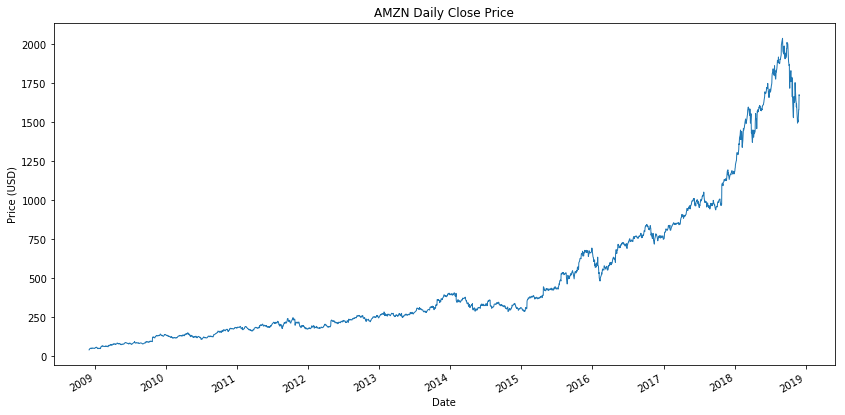

In [7]:
# Plot stock price chart.
stock_df['close'].plot(kind='line', figsize=(14, 7), linewidth=1)
plt.title("AMZN Daily Close Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show() 

### Moving average crossover

A common indicator added to stock price charts are moving averages. Moving average lines (simple moving averages here, SMAs) of different periods are used in trading strategies to signal potential buy or sell opportunities. If an SMA with a lower period crosses from below to above a longer SMA it is interpreted as a buy signal (and vice versa).

In [8]:
# Calculate the simple moving averages and add columns with results to the DataFrame.
stock_df['SMA20'] = stock_df['close'].rolling(20).mean()
stock_df['SMA50'] = stock_df['close'].rolling(50).mean()
stock_df['SMA100'] = stock_df['close'].rolling(100).mean()
stock_df['SMA200'] = stock_df['close'].rolling(200).mean()
stock_df.tail()

,close,open,high,low,daily_pct_change,SMA20,SMA50,SMA100,SMA200
date,,,,,,,,,
2018-11-23,1502.06,1517.00,1536.20,1501.810,-0.97,1612.0520,1768.4600,1819.9421,1691.651525
2018-11-26,1581.33,1539.00,1584.81,1524.220,5.28,1608.9780,1760.6828,1818.7581,1692.860175
2018-11-27,1581.42,1575.99,1597.65,1558.010,0.01,1611.1050,1754.1506,1817.4660,1693.836125
2018-11-28,1677.75,1613.92,1681.45,1601.215,6.09,1618.4715,1748.8846,1816.8533,1695.152325
2018-11-29,1673.57,1674.99,1689.99,1652.331,-0.25,1622.2495,1743.8276,1816.1583,1696.264925


The time periods used for an SMA depend on the type of trading an individual does. The 100 and 200 day are common longer term SMAs and are watched by many. 

Looking at the earlier chart, Amazon's stock price seems to start rising quickly in early 2015, so I will zoom in on this period and plot the chart, this time with SMAs included.

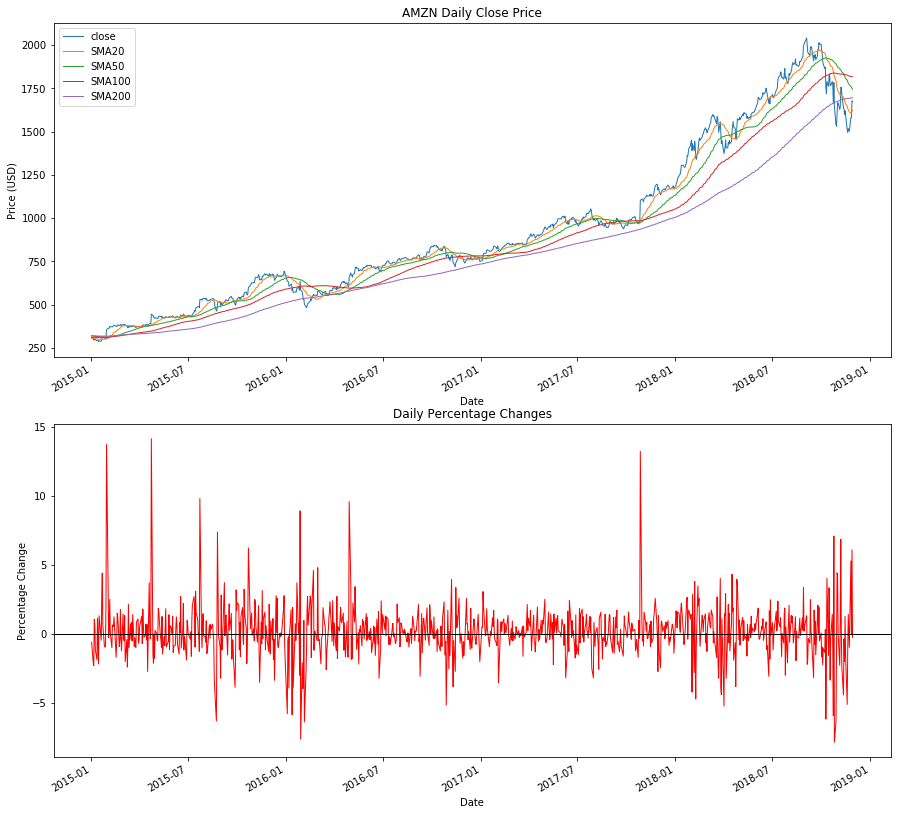

In [9]:
# Select the date range to plot [start:end].
range_df = stock_df.loc['2015-01-01':'2018-11-29']

# Initialise the plot.
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
# Plot the closing prices, SMAs and percentage changes.
range_df[['close', 'SMA20', 'SMA50', 'SMA100', 'SMA200']].plot(kind='line', ax=ax1, linewidth=1)
range_df['daily_pct_change'].plot(kind='line', ax=ax2, linewidth=1, color='r')
ax1.set_title('AMZN Daily Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
ax2.axhline(y=0, linewidth=1, color='k')
ax2.set_title('Daily Percentage Changes')
ax2.set_xlabel('Date')
ax2.set_ylabel('Percentage Change')
# Show the plot.
plt.show()

Other than at the start of 2015 there do not appear to be any crossovers of the SMA100 and SMA200 in the zoomed-in period. Both of these SMAs are rising together fairly steadily which in itself is an indicator of the bullish trend in this timeframe. Moving averages of different periods rising or falling together without crossover indicates a continuing trend. Additionally the Amazon price being above both these longer term SMAs for sustained periods is also supportive of the bullish trend.

It is clear (and obviously expected) that the shorter period SMAs are more responsive to stock price action. The chart shows several crossovers even in this short timeframe. So I will use the SMA20 and SMA50 to form a shorter term crossover strategy.

In [10]:
# Add a trend column to the DataFrame where the values are bullish or bearish depending on the relative values of the SMA20 and SMA50.
stock_df['trend'] = np.where(((stock_df['SMA20'] > stock_df['SMA50'])), 'bullish', 'bearish')
stock_df.head()

,close,open,high,low,daily_pct_change,SMA20,SMA50,SMA100,SMA200,trend
date,,,,,,,,,,
2008-12-01,40.47,42.00,43.26,40.38,NaN,NaN,NaN,NaN,NaN,bearish
2008-12-02,41.19,41.39,41.71,38.82,1.78,NaN,NaN,NaN,NaN,bearish
2008-12-03,45.21,40.16,45.88,40.05,9.76,NaN,NaN,NaN,NaN,bearish
2008-12-04,47.32,45.94,50.50,45.75,4.67,NaN,NaN,NaN,NaN,bearish
2008-12-05,48.26,45.89,48.49,43.30,1.99,NaN,NaN,NaN,NaN,bearish


Since SMA calculations require a certain number of data points, some early rows in the SMA columns have NaN values. For example to calculate SMA20, 20 rows are needed (19 previous and the current), so those initial 19 rows do not have an SMA20 value and NaN is shown in the column. The trend value for these rows is incorrectly shown as a "bearish" as a result of the else value in the above where() function. To rectify this, NaN values are inserted into the trend column where either the SMA20 and SMA50 are null. 

In [11]:
# Replace the incorrect trend column values with NaN where either the SMA20 or SMA50 are null. 
stock_df['trend'] = np.where(((stock_df['SMA20'].isnull()) | (stock_df['SMA50'].isnull())), np.nan, stock_df['trend'])
stock_df.head()

,close,open,high,low,daily_pct_change,SMA20,SMA50,SMA100,SMA200,trend
date,,,,,,,,,,
2008-12-01,40.47,42.00,43.26,40.38,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-02,41.19,41.39,41.71,38.82,1.78,NaN,NaN,NaN,NaN,NaN
2008-12-03,45.21,40.16,45.88,40.05,9.76,NaN,NaN,NaN,NaN,NaN
2008-12-04,47.32,45.94,50.50,45.75,4.67,NaN,NaN,NaN,NaN,NaN
2008-12-05,48.26,45.89,48.49,43.30,1.99,NaN,NaN,NaN,NaN,NaN


It is now possible to count the number of times in this dataset that the SMA20 is above the SMA50 (bullish trend) and the number below (bearish trend). 

In [12]:
stock_df["trend"].value_counts()

bullish    1753
bearish     716
Name: trend, dtype: int64

The ratio of bullish to bearish trend values in this dataset is almost 2.5:1. Now to find the entry and exit points to buy/sell the Amazon stock by creating a signal for when the trend value changes from bullish to bearish or vice versa. This is done by comparing the current row's trend value with that in the previous row. If they differ it is possible that a change in trend is about to begin due to an SMA crossover and it indicates either a buying or selling opportunity.

In [13]:
# Create a signal column in the DataFrame for buying and selling points (1 indicates a buy, -1 indicates a sell).
# Numbers instead of strings are being used to represent signals because they will be used to create positions later.
# Buy signals.
stock_df['signal'] = np.where(((stock_df['trend'] != stock_df['trend'].shift(1)) & (stock_df['trend'] == "bullish")), 1, 0)
# Sell signals. Using stock_df['signal'] as the else in the where() maintains the values in the column set above.
stock_df['signal'] = np.where(((stock_df['trend'] != stock_df['trend'].shift(1)) & (stock_df['trend'] == "bearish")), -1, stock_df['signal'])
# Rectify for NaN rows, otherwise maintaining the values set above.
stock_df['signal'] = np.where(((stock_df['SMA20'].isnull()) | (stock_df['SMA50'].isnull())), np.nan, stock_df['signal'])

By filtering the DataFrame it is possible to isolate the rows with these signals.

In [14]:
# Filtering for only the rows containing trade signals.
signal_filter = (stock_df['signal'].ne(0)) & (stock_df['signal'].notnull())
stock_df[signal_filter].head(10)

,close,open,high,low,daily_pct_change,SMA20,SMA50,SMA100,SMA200,trend,signal
date,,,,,,,,,,,
2009-02-11,64.354,63.100,64.90,62.25,1.65,55.91120,52.88868,NaN,NaN,bullish,1.0
2009-07-14,81.950,81.480,82.42,80.42,0.59,80.46925,80.47910,76.431950,NaN,bearish,-1.0
2009-07-15,84.550,83.000,84.64,82.78,3.17,80.58925,80.57470,76.638850,NaN,bullish,1.0
2009-09-02,78.140,79.035,80.15,77.80,-1.29,83.27250,83.48980,81.878450,NaN,bearish,-1.0
2009-09-25,90.520,91.440,92.25,89.75,-1.73,85.41300,85.35280,83.005850,73.570045,bullish,1.0
2010-01-21,126.620,127.260,128.15,125.00,0.67,132.32590,132.47916,114.379749,98.078850,bearish,-1.0
2010-03-16,131.790,131.240,132.29,130.50,0.50,124.73200,124.29196,126.691449,106.230450,bullish,1.0
2010-05-19,124.590,125.510,127.93,123.80,-1.34,134.41865,135.36246,130.120910,117.952639,bearish,-1.0
2010-08-06,128.320,126.720,128.40,125.90,0.38,120.85250,120.45904,127.448650,127.070050,bullish,1.0


In [15]:
# Count the total number of buy and sell signals in this DataFrame.
stock_df[signal_filter]['signal'].value_counts()

-1.0    24
 1.0    24
Name: signal, dtype: int64

To visualise where these trade signals occur they can be plotted on the same graph as the stock price.

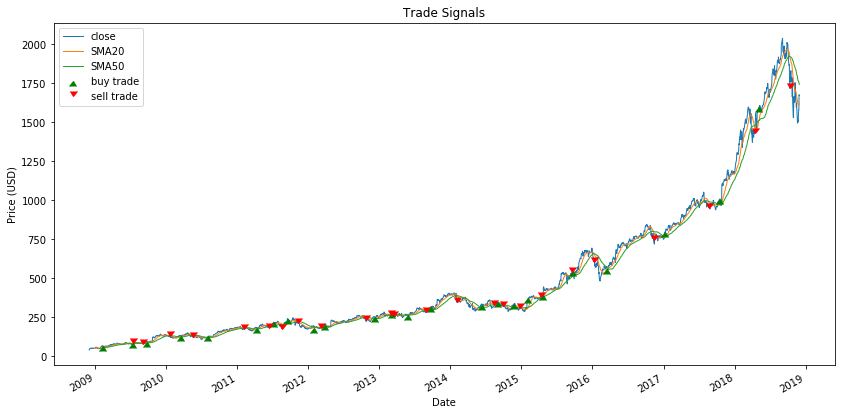

In [16]:
# Plot close price and SMAs.
stock_df[['close', 'SMA20', 'SMA50']].plot(kind='line', linewidth=1, figsize=(14, 7))

# All index values where signal column equals 1.
buy_markers_x = stock_df.loc[stock_df['signal'] == 1].index
# All values in close column for all rows where signal equals 1.
buy_markers_y = stock_df.loc[stock_df['signal'] == 1, 'close'].values
# Plot buy markers.
plt.plot(buy_markers_x, buy_markers_y, color='g', linestyle='None', marker=6, markersize=7, label="buy trade")

# All index values where signal column equals -1.
sell_markers_x = stock_df.loc[stock_df['signal'] == -1].index
# All values in close column for all rows where signal equals -1.
sell_markers_y = stock_df.loc[stock_df['signal'] == -1, 'close'].values
# Plot sell markers.
plt.plot(sell_markers_x, sell_markers_y, color='r', linestyle='None', marker=7, markersize=7, label="sell trade")

plt.title("Trade Signals")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

### Implementing the strategy

To implement the moving average crossover strategy a new position column will be created in the DataFrame to hold the value of the shares at the point they are bought or sold. Buying and selling of the stock will be done at the open price of the day following an SMA crossover. In this simple strategy no more than 10 shares will be held at a time. At each buy/sell signal 10 shares will be bought or sold, buying when SMA20 crosses above SMA50 and selling the next time the SMA20 crosses below the SMA50.

In [17]:
# Create a new position column which shows the values of any buys or sells. Shares are bought or sold at the open price on the next trading day following a signal.
stock_df['position'] = stock_df['signal'].shift(1).mul(10) * stock_df['open']

# Filter out the rows with positions to see some of these.
position_filter = (stock_df['position'].ne(0)) & (stock_df['position'].notnull())
stock_df[position_filter].head(10)

,close,open,high,low,daily_pct_change,SMA20,SMA50,SMA100,SMA200,trend,signal,position
date,,,,,,,,,,,,
2009-02-12,63.96,63.25,64.250,61.7100,-0.61,56.68470,53.35848,NaN,NaN,bullish,0.0,632.5
2009-07-15,84.55,83.00,84.640,82.7800,3.17,80.58925,80.57470,76.638850,NaN,bullish,1.0,-830.0
2009-07-16,86.11,84.42,86.240,83.7200,1.85,80.76225,80.65890,76.882850,NaN,bullish,0.0,844.2
2009-09-03,78.46,78.39,78.960,77.5100,0.41,82.97200,83.47360,81.890850,NaN,bearish,0.0,-783.9
2009-09-28,92.21,91.04,92.810,90.6000,1.87,85.88550,85.48000,83.108050,73.782595,bullish,0.0,910.4
2010-01-22,121.43,125.60,127.670,120.7600,-4.10,131.70990,132.37436,114.766449,98.308450,bearish,0.0,-1256.0
2010-03-17,131.34,132.41,132.694,131.2200,-0.34,125.48350,124.24076,127.070649,106.471900,bullish,0.0,1324.1
2010-05-20,119.71,122.64,125.000,118.7800,-3.92,132.89965,135.14646,129.933310,118.122189,bearish,0.0,-1226.4
2010-08-09,128.83,128.46,129.930,127.8501,0.40,121.31850,120.50164,127.423550,127.247100,bullish,0.0,1284.6


The initial balance will be $50000 and as stated earlier, for simplicity 10 shares will be bought/sold at each signal (usually investments would be made as a percentage of the balance to manage risk).

In [18]:
# Initialise variables. 
opening_balance = 50000
balance = opening_balance
balance_list = []
no_of_shares = 0
held_shares_value = 0
trade_counter = 0

# Iterate through each value in the position column, updating the balance and adding the value to the balance_list.
# Values in the position column of the DataFrame are either positive (buy) or negative (sell). 
for pos in stock_df['position']:
    if pos > 0 and not balance < pos:
        # Buy shares if current balance is sufficient.
        balance -= pos
        balance_list.append(balance)
        no_of_shares += 10
        held_shares_value = pos
        trade_counter += 1
    elif pos < 0 and not no_of_shares == 0 :
        # Sell currently held shares. Only sell if there are already bought shares in hand. 
        # Note that the absolute value of pos is used because negative sign is just the result of the sell signal indicator (-1).
        balance += abs(pos)
        balance_list.append(balance)
        no_of_shares -= 10
        held_shares_value = 0
        trade_counter += 1
    else:
        # pos is 0 (not buying or selling).
        balance_list.append(balance)

# Convert the balance_list to a Pandas Series of floats and add it to the DataFrame. This will show a rolling balance.
balance_series = pd.Series(balance_list).astype(float)
stock_df['balance_roll'] = balance_series.values.round(2)
stock_df.tail()

,close,open,high,low,daily_pct_change,SMA20,SMA50,SMA100,SMA200,trend,signal,position,balance_roll
date,,,,,,,,,,,,,
2018-11-23,1502.06,1517.00,1536.20,1501.810,-0.97,1612.0520,1768.4600,1819.9421,1691.651525,bearish,0.0,0.0,62780.73
2018-11-26,1581.33,1539.00,1584.81,1524.220,5.28,1608.9780,1760.6828,1818.7581,1692.860175,bearish,0.0,0.0,62780.73
2018-11-27,1581.42,1575.99,1597.65,1558.010,0.01,1611.1050,1754.1506,1817.4660,1693.836125,bearish,0.0,0.0,62780.73
2018-11-28,1677.75,1613.92,1681.45,1601.215,6.09,1618.4715,1748.8846,1816.8533,1695.152325,bearish,0.0,0.0,62780.73
2018-11-29,1673.57,1674.99,1689.99,1652.331,-0.25,1622.2495,1743.8276,1816.1583,1696.264925,bearish,0.0,0.0,62780.73


The trade counter vairable kept tally of the number of buy and sell trades made in the SMA crossover strategy.

In [19]:
print(trade_counter)

48


After this period of investment using the SMA crossover strategy, the total assets is the sum of the balance and any shares still being held. The percentage change on the initial £50000 invested is easy to calculate using the total assets and starting balance.

In [20]:
# Function to calculate percentage change on initial balance.
def percentage_change(initial_balance, balance, shares_held):
    total_assets = balance + shares_held
    pct_change = ((total_assets - initial_balance) / initial_balance) * 100
    print("Initial balance: £{}".format(round(initial_balance, 2)))
    print("Balance: £{}".format(round(balance, 2)))
    print("Shares held: £{}".format(round(shares_held, 2)))
    print("Total: £{}".format(round(total_assets, 2)))
    if pct_change >= 0:
        print("Percentage change: +{}%".format(round(pct_change, 1)))
    else:
        print("Percentage change: -{}%".format(round(pct_change, 1)))

# Call function to see return from SMA crossover strategy.
percentage_change(opening_balance, balance, held_shares_value)

Initial balance: £50000
Balance: £62780.73
Shares held: £0
Total: £62780.73
Percentage change: +25.6%


## Was it worth it?

In the simple crossover strategy a total number of 48 trades were made and it resulted in a 25.6% profit. However if 10 shares had been invested at the same time as the first trade in the crossover strategy and then left open, would it have yielded similar profitablity? 

In [22]:
# Find first buy trade in DataFrame using the position_filter from earlier.
position_df = stock_df[position_filter]
first_pos = 0
for pos in position_df['position']:
    if pos > 0:
        first_pos = pos
        break

# Find last price of shares in DataFrame to calculate the current value of shares held (assumption that the 10 shares bought are still being held).
last_price = stock_df['open'].iat[-1]

# Find percentage change using function created earlier.
single_trade_balance = opening_balance - first_pos
single_held_shares_value = last_price * 10
percentage_change(opening_balance, single_trade_balance, single_held_shares_value)

Initial balance: £50000
Balance: £49367.5
Shares held: £16749.9
Total: £66117.4
Percentage change: +32.2%


The return was almost 7% higher with just a single trade held open over the 10 year (approx.) period, compared to implementing the SMA crossover strategy. 

Save the completed DataFrame to a CSV file.

In [21]:
stock_df.to_csv('results.csv')

## Summary

Amazon is an unusual stock. There have been few major fluctuations in its share price and the overall trend has been fairly bullish in this time period, with 1753 bullish days and 716 bearish. 

The crossover strategy implemented in this project is a simple one that used two short-term moving averages, the 20 and 50 day, to signal potential trading opportunities. While the SMA crossover strategy worked well on Amazon stock prices, with a 25.6% percentage increase in total asset value within the time period, profitability would vary for other more volatile companies. 

With a 32.2% increase in total asset value, the single trade strategy outperformed the simple SMA crossover strategy. However this does not indicate that the latter is worse. As already stated other companies/stocks would behave differently and as they say, hindsight is a wonderful thing. 

Further study could include looking into how the crossover strategy fares on more volatile stock prices for other companies and how the strategy could be improved to increase the percentage return, such as changing when trades are entered and exited, the periods of the SMAs that are used and introducing stop and limit orders to maximise profits and cut losses.